In [23]:
#Book Recommendation System
#Develop a book recommendation system that can accurately suggest books to users based on their preferences,
#past reading history, and demographic information. 
#The system should address the challenge of personalized recommendations while considering factors such as genre, author, user ratings, and popularity.


In [24]:

#Importing the libraries needed for Fitting the model, cleaning, preprocessing and reading

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [25]:
#Reading the dataset and encoding and skiping the null val
df=pd.read_csv('Books_tyl.csv',on_bad_lines='skip',encoding="latin-1")
print(df.head)

<bound method NDFrame.head of        bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11118   45631   Expelled from Eden: A William T. Vollmann Reader   
11119   45633                        You Bright and Risen Angels   
11120   45634                    The Ice-Shirt (Seven Dreams #1)   
11121   45639                                        Poor People   
11122   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                            J.K. Rowling/Mary GrandPrÃ©            4.57   
1

In [26]:
#describing the dataset to check the count,mean- min and max for plotting the features in the last
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


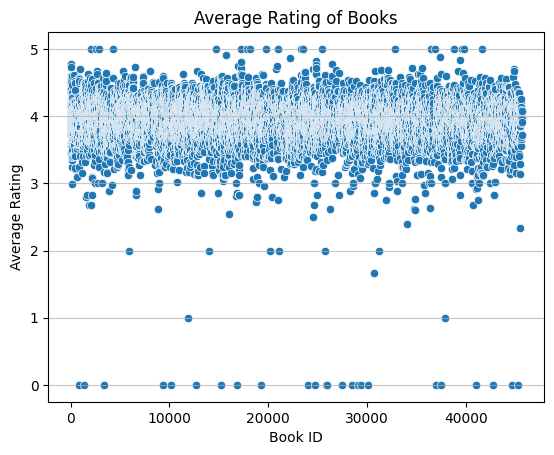

In [27]:
#using matplotlib to plot a scatter plot for the present dataset and visualize them
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='bookID', y='average_rating', data=df)
plt.xlabel('Book ID')
plt.ylabel('Average Rating')
plt.title('Average Rating of Books')
plt.grid(axis='y',alpha=0.7) #the value of the alpha shows the transparency
plt.show()

In [28]:
df2 = df.copy()

In [29]:
#in this block we adjust and clean the unncessary data according to the ratings

df2.loc[ (df2['average_rating'] >= 0) & (df2['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df2.loc[ (df2['average_rating'] > 1) & (df2['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df2.loc[ (df2['average_rating'] > 2) & (df2['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df2.loc[ (df2['average_rating'] > 3) & (df2['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df2.loc[ (df2['average_rating'] > 4) & (df2['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [30]:
#just adding the dummy values to fit the colouns
rating=pd.get_dummies(df2['rating_between'])
lang=pd.get_dummies(df2['language_code'])

In [31]:
#concatinating the rating and the count of the rating to adjust the column:features
features = pd.concat([rating,lang,df2['average_rating'],df2['ratings_count']], axis=1)

In [32]:
#PreProcessng the data
scaler=MinMaxScaler()


In [33]:
features=scaler.fit_transform(features)

In [55]:
#impoting the Kmeans Algorithm and fitting the model and checking the labels
kme=KMeans(n_clusters=8,random_state=42)
kme.fit(features)
labels=kme.labels_

C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features)
features_reduced.shape

(11123, 2)

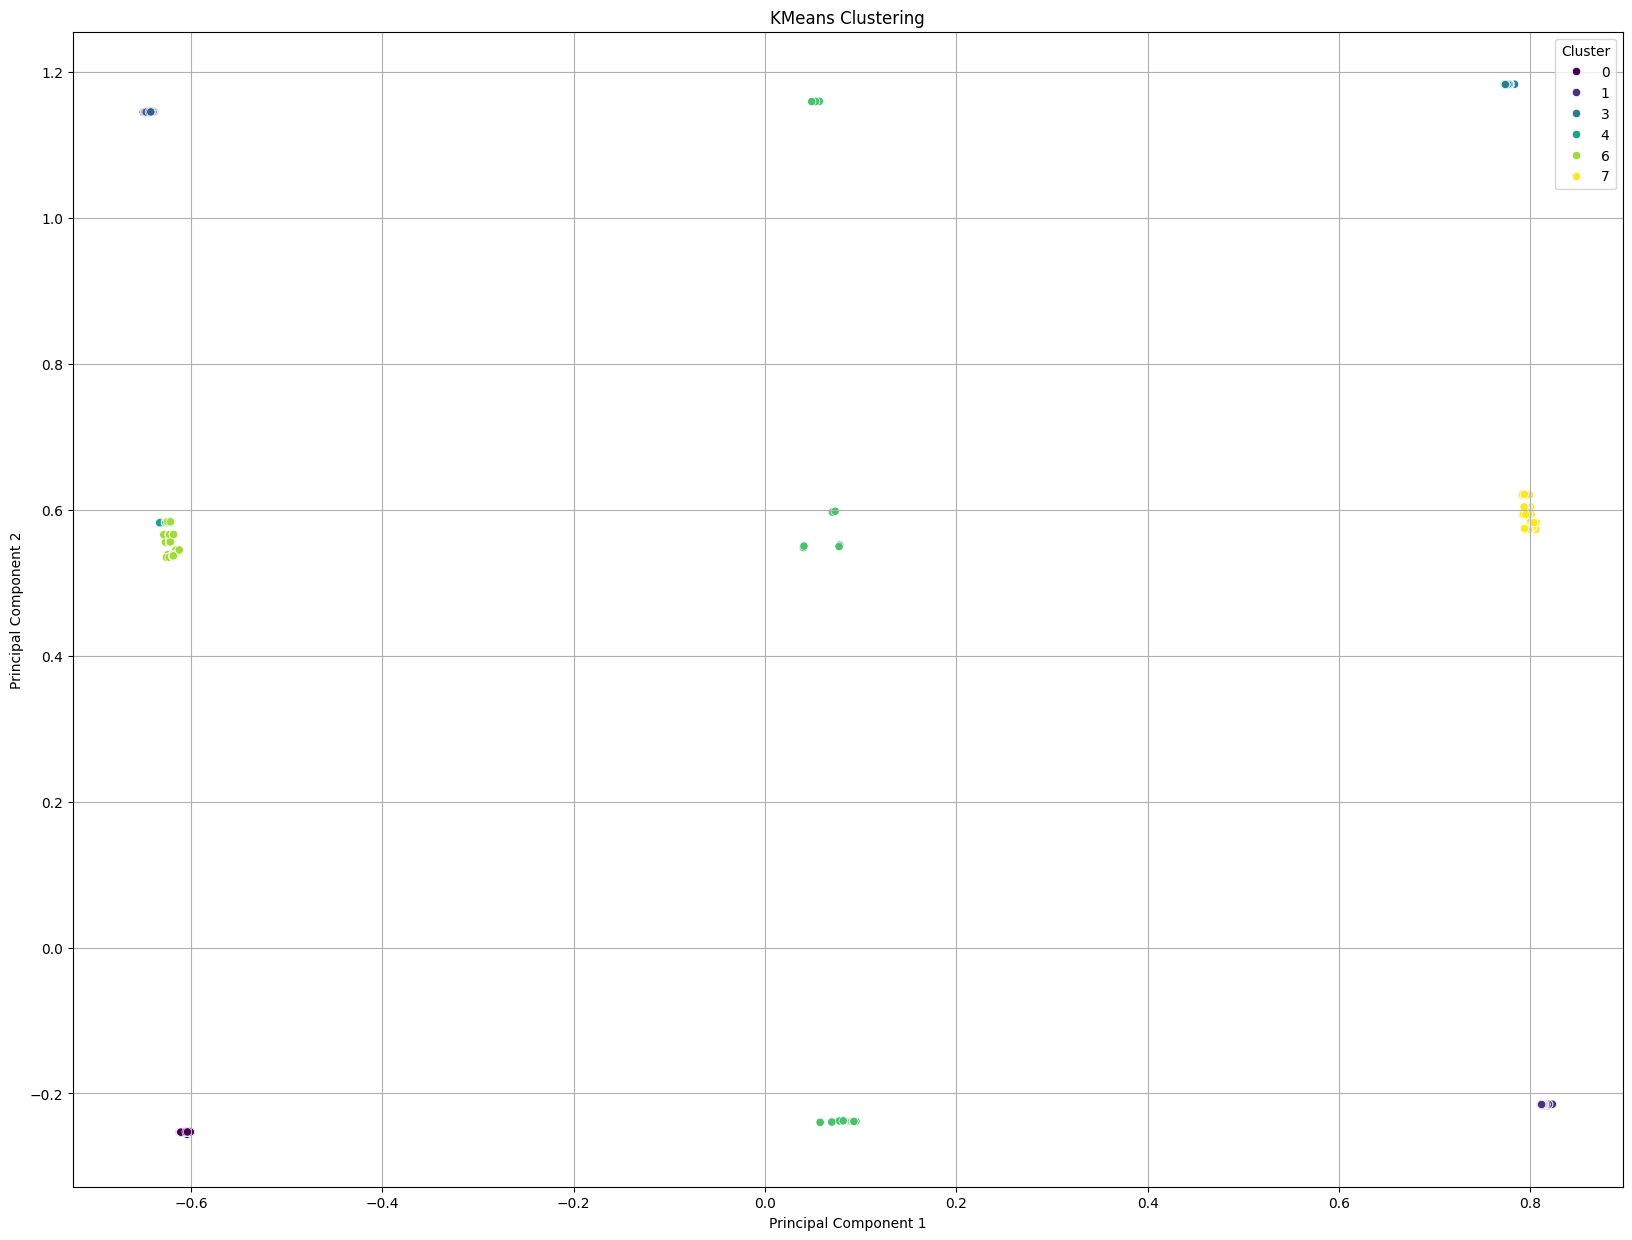

In [65]:
plt.figure(figsize=(20, 15))
sns.scatterplot(x=features_reduced[:, 0], y=features_reduced[:, 1], hue=labels, palette='viridis',legend='auto')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [37]:
#Predicting/Reommending the books based on the book id; since it recommends a lot of books we have taken the top 10 in decending order of the book ratings which is similar

def recommend_top_books(book_id, df, labels, top_n=10, sort_by='average_rating'):
    book_cluster = labels[df[df['bookID'] == book_id].index[0]]
    similar_books = df[df.index.isin(np.where(labels == book_cluster)[0])]
    similar_books = similar_books[similar_books['bookID'] != book_id]
    similar_books = similar_books.sort_values(by=sort_by, ascending=False)
    return similar_books.head(top_n)


book_id = 27 #HEre we hv used the id 27 to predict the books similar to 27
recommended_top_books = recommend_top_books(book_id, df, labels)
print(recommended_top_books)


       bookID                                              title  \
4631    16654    The Work of the Sun (The Green Lion Trilogy #3)   
10140   41053                             No Cherubs for Melanie   
4216    15082             The Complete Films Of Alfred Hitchcock   
8931    34548  If Chins Could Kill: Confessions of a B Movie ...   
10103   40833                                       Turtle Diary   
9222    36140  Strawberry Days: How Internment Destroyed a Ja...   
5306    19163                                            Inferno   
8472    32540  Conversations with Bernard Malamud (Literary C...   
2900    10760                                   Sword and Shield   
8469    32533  The Art of Fiction: Notes on Craft for Young W...   

                                                 authors  average_rating  \
4631                                     Teresa Edgerton             4.0   
10140                                     James  Hawkins             4.0   
4216                   

In [38]:
#for unsupervised learning we dont hv classification reports so i have used silhouette sccore which I have written below
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(features,labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8967610505977124


**Silhouette Score:**
A score close to +1 indicates that the instances are well clustered and are far away from neighboring clusters.
A score around 0 indicates overlapping clusters.
A score close to -1 indicates that the instances may have been assigned to the wrong cluster.

In [39]:
#Just checking the shpe of feaatures and centres for plotting
centers=kme.cluster_centers_
print(features.shape)
print(centers.shape)


(11123, 34)
(6, 34)


C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

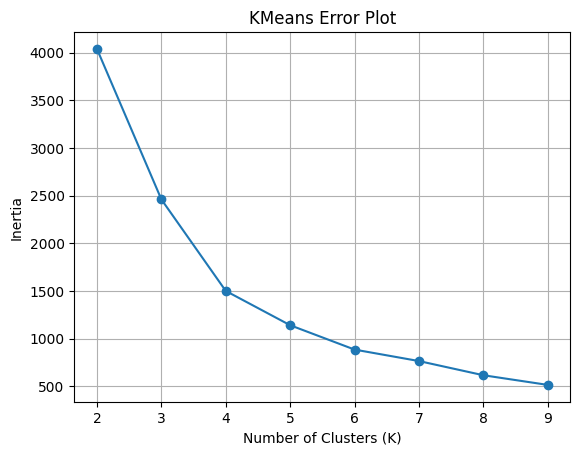

In [40]:
#kmeans Error Analysis(Elbow Method)

inertia = []
k_values = range(2, 10)# Number of clusters (K)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('KMeans Error Plot')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Acoording to the kmeans error plot, we can see that after the no. of clusters =18 will remain equal or similar, so the elbow is method is not that precise. Lets check uding the silhouette analysis and find the best no. of clusters to get better results/outputs

C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[]


C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.6892791448651912]


C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.6892791448651912, 0.7815487294450517]


C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.6892791448651912, 0.7815487294450517, 0.843775063039476]


C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.6892791448651912, 0.7815487294450517, 0.843775063039476, 0.8744114837386586]


C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.6892791448651912, 0.7815487294450517, 0.843775063039476, 0.8744114837386586, 0.8967610505977124]


C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.6892791448651912, 0.7815487294450517, 0.843775063039476, 0.8744114837386586, 0.8967610505977124, 0.9071496318130841]


C:\Users\varehn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0.6892791448651912, 0.7815487294450517, 0.843775063039476, 0.8744114837386586, 0.8967610505977124, 0.9071496318130841, 0.9191899520908059]


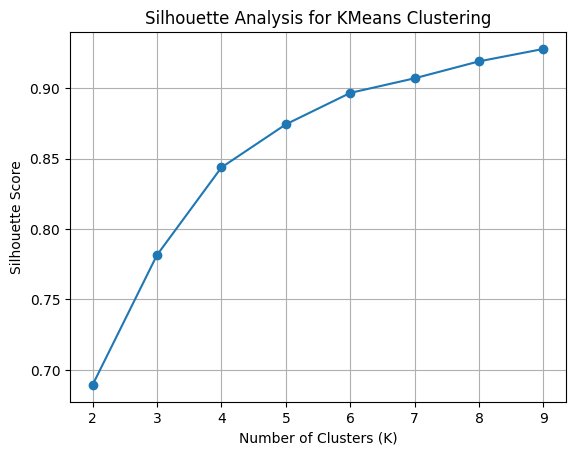

In [41]:
# Silhouette analysis
silhouette_scores = []
# k_values = range(2, 11)  # Number of clusters (K)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(features, labels)
    print(silhouette_scores)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette analysis
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for KMeans Clustering')
plt.xticks(k_values)
plt.grid(True)
plt.show()